In [2]:
# ---- PORTAFOLIO ANALYZER -----

# Para realizar un análisis adecuado, es necesario recuperar el balance diario generado por estrategia.
# Para lograr lo anterior, se debe agregar nuevas funcionalidades a las comunicaciones enviadas por MQL5.
# Enviar de manera diaria el balance de la cuenta junto a los volúmenes.
# Cada estrategia debe verse como un activo financiero.
# En la versión actual, los cálculos se realizan con la información de los trades. 
# En futuras versiones se incorporará lo mencionado anteriormente.

In [3]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import portafolio.
expert1 = pd.read_csv("dataset/expert_4321_data.csv")
expert2 = pd.read_csv("dataset/expert_4376_data.csv")
expert3 = pd.read_csv("dataset/expert_5874_data.csv")

In [5]:
get_balance = lambda data: data[data.direction == "out"]["balance"].to_frame()
exp1 = get_balance(expert1)
exp2 = get_balance(expert2)
exp3 = get_balance(expert3)

for expert in (exp1, exp2, exp3):
    expert.columns = ["Daily Balance"]
    expert["Normed Return"] = expert["Daily Balance"] / expert.iloc[0]["Daily Balance"]

In [6]:
exp3.head()

,Daily Balance,Normed Return
1,4913.16,1.000000
3,4629.66,0.942298
5,4644.86,0.945392
7,4650.46,0.946531
9,4664.19,0.949326


In [75]:
# Allocations.
allocations = [.3,.2,.5]
for expert, allocation in zip([exp1,exp2,exp3], allocations):
    expert['Allocation'] = expert['Normed Return'] * allocation

In [76]:
exp3.tail()

,Daily Balance,Normed Return,Allocation
145,4062.04,0.826767,0.413384
147,4111.24,0.836781,0.418391
149,4160.34,0.846775,0.423387
151,4135.64,0.841747,0.420874
153,4184.84,0.851761,0.425881


In [84]:
# Investment.
investment = 15000
for expert in [exp1, exp2, exp3]:
    expert["Position Values"] = expert["Allocation"] * investment

In [85]:
exp2.tail()

,Daily Balance,Normed Return,Allocation,Position Values
497,5303.47,1.061611,0.212322,3184.833696
499,5300.82,1.061081,0.212216,3183.242321
501,5297.79,1.060474,0.212095,3181.422749
503,5295.50,1.060016,0.212003,3180.047561
505,5294.87,1.059890,0.211978,3179.669234


In [120]:
# Total Portfolio Value.
portfolio_val = pd.concat([exp1["Position Values"], exp2["Position Values"], exp3["Position Values"]], axis = 1)
portfolio_val.columns = ["Expert 1 Pos", "Expert 2 Pos", "Expert 3 Pos"]
portfolio_val.fillna(portfolio_val.mean(), inplace = True)
portfolio_val.tail()

,Expert 1 Pos,Expert 2 Pos,Expert 3 Pos
497,4542.524955,3184.833696,6492.429608
499,4542.524955,3183.242321,6492.429608
501,4542.524955,3181.422749,6492.429608
503,4542.524955,3180.047561,6492.429608
505,4542.524955,3179.669234,6492.429608


In [121]:
portfolio_val["Total Pos"] = portfolio_val.sum(axis = 1)

Text(0,0.5,'Portafolio Value')

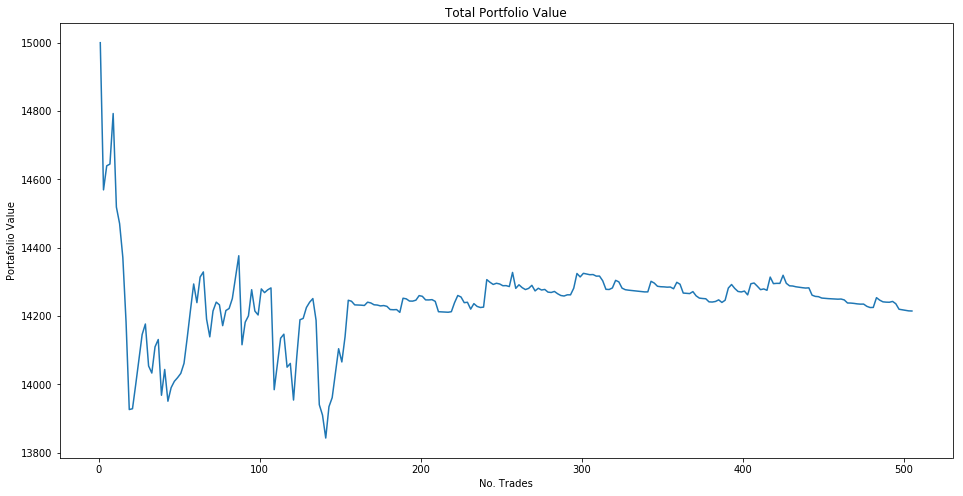

In [123]:
portfolio_val["Total Pos"].plot(figsize = (16, 8))
plt.title("Total Portfolio Value")
plt.xlabel("No. Trades")
plt.ylabel("Portafolio Value")

Text(0,0.5,'Position Value')

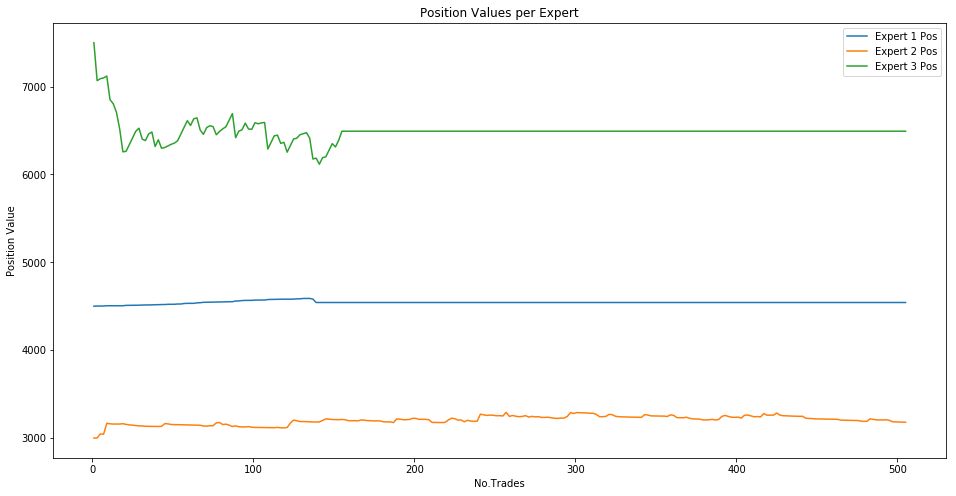

In [124]:
portfolio_val.drop("Total Pos", axis = 1).plot(kind = "line", figsize = (16, 8))
plt.title("Position Values per Expert")
plt.xlabel("No.Trades")
plt.ylabel("Position Value")

In [125]:
# Portafolio Statistics.

# Daily return.
portfolio_val["Daily Return"] = portfolio_val["Total Pos"].pct_change(1)

# Cumulative return.
cum_ret = 100 * (portfolio_val["Total Pos"].iloc[-1] / portfolio_val["Total Pos"].iloc[0] - 1)
print("Our return {} was percent".format(cum_ret))

Our return -5.235841349638937 was percent


In [126]:
# Avg Daily Return.
portfolio_val["Daily Return"].mean()

-0.000204429212119829

In [127]:
portfolio_val["Daily Return"].std()

0.004222926725266056

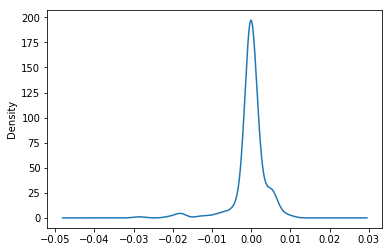

In [128]:
portfolio_val["Daily Return"].plot(kind = "kde")

In [129]:
# Sharpe Ratio.
SR = portfolio_val["Daily Return"].mean() / portfolio_val["Daily Return"].std()
SR

-0.048409367583082896

In [130]:
# Annualized Sharpe Ratio. K-Value * SR

# Daily = sqrt(252)
# Weekly = sqrt(52)
# Monthly = sqrt(12)

In [131]:
ASR = (252 ** 0.5) * SR
ASR

-0.7684748865044956

In [132]:
# Portfolio STD.
portfolio_val["Daily Return"].std()

0.004222926725266056

In [133]:
# Portfolio Mean.
portfolio_val["Daily Return"].mean()

-0.000204429212119829